In [3]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "mouse_drug_data.csv"
clinical_trial_data_to_load = "clinicaltrial_data.csv"

# Read the Mouse and Drug Data 

mouse_data = pd.read_csv(mouse_drug_data_to_load)

mouse_data.head()


# Display the data table for preview

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [4]:
# Read the  Clinical Trial Data

clinical_data = pd.read_csv(clinical_trial_data_to_load)

clinical_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
# Combine the data into a single dataset

pharma_data_complete = pd.merge(mouse_data, clinical_data, how="left", on=["Mouse ID"])  

# Display the data table for preview

pharma_data_complete.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [6]:
#Tumor Response to Treatment

# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

tumor_data=pharma_data_complete.groupby(["Drug", "Timepoint"]).mean()

tumor_data

# Convert to DataFrame

tumor_data.reset_index(inplace=True) 

del tumor_data["Metastatic Sites"]

# Preview DataFrame

tumor_data.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [7]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

from scipy.stats import sem

std_vol_error=pharma_data_complete.groupby(["Drug", "Timepoint"]).sem()

# Convert to DataFrame

del std_vol_error["Mouse ID"]
del std_vol_error["Metastatic Sites"]

std_vol_error.reset_index(inplace=True)

# Preview DataFrame

std_vol_error.head()



,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [8]:
# Minor Data Munging to Re-Format the Data Frames

tumor_data_pivot=pd.pivot_table(tumor_data, values = 'Tumor Volume (mm3)', index=['Timepoint'],
columns = 'Drug')

# Preview that Reformatting worked

tumor_data_pivot


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [ ]:
#print(tumor_data["Timepoint"(45)])

tumor_change=(((tumor_data.iloc[-1])-(tumor_data.iloc[0]))/tumor_data.iloc[0])*100
tumor_change


# tumor_change=((tumor_data["Tumor Volume (mm3)"(45)]-tumor_data["Tumor Volume (mm3)"(0)])/
# tumor_data["Tumor Volume (mm3)"(0)])*100
    
# tumor_change

# school_group["% Pass Math"] = (school_group["school_math_count"])/(school_group["size"])*100



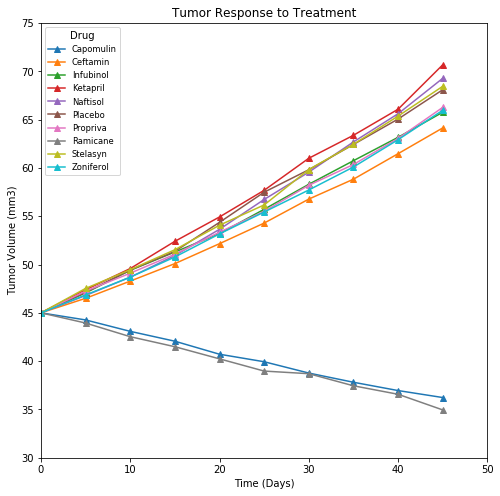

In [9]:
tumor_data_pivot.reset_index(inplace=True) 

#tumor_data_pivot

plt.figure(figsize=(8,8))

x_axis = tumor_data_pivot["Timepoint"]

plt.plot(x_axis,tumor_data_pivot["Capomulin"], marker='^')
plt.plot(x_axis,tumor_data_pivot["Ceftamin"], marker='^')
plt.plot(x_axis,tumor_data_pivot["Infubinol"], marker='^')
plt.plot(x_axis,tumor_data_pivot["Ketapril"], marker='^')
plt.plot(x_axis,tumor_data_pivot["Naftisol"], marker='^')
plt.plot(x_axis,tumor_data_pivot["Placebo"], marker='^')
plt.plot(x_axis,tumor_data_pivot["Propriva"], marker='^')
plt.plot(x_axis,tumor_data_pivot["Ramicane"], marker='^')
plt.plot(x_axis,tumor_data_pivot["Stelasyn"], marker='^')
plt.plot(x_axis,tumor_data_pivot["Zoniferol"], marker='^')

# Create a legend for our chart
                           
plt.legend(loc="upper left")
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")

legend = plt.legend(fontsize="small", mode="Expanded", 
                 loc="best", title="Drug",
                 labelspacing=0.5)

plt.xlim(0, 50)
plt.ylim(30, 75)

#x.errorbar(np.arange(0, len(means)), means, yerr=sem, fmt="o", color="b", alpha=0.5, label="Mean of House Price")
#x.errorbar(x_axis, y-axis, standard_errors, fmt="o")

legend = plt.legend(fontsize="small", mode="Expanded", 
                 loc="best", title="Drug",
                 labelspacing=0.5)
legend.legendHandles[0]._sizes = [15]
legend.legendHandles[1]._sizes = [15]
legend.legendHandles[2]._sizes = [15]
legend.legendHandles[3]._sizes = [15]
legend.legendHandles[4]._sizes = [15]
legend.legendHandles[5]._sizes = [15]
legend.legendHandles[6]._sizes = [15]
legend.legendHandles[7]._sizes = [15]
legend.legendHandles[8]._sizes = [15]
legend.legendHandles[9]._sizes = [15]

#points_Capomulin_handle = plt.plot(x_axis, points_Capomulin, marker ='o', label="Capomulin")
#points_Ceftamin_handle = plt.plot(x_axis, points_Ceftamin, marker='^', color='blue', label="Infubinol")
#points_K_handle = plt.plot(x_axis, points_C, marker ='o', color='green', label="Ketapril")
#points_P_handle = plt.plot(x_axis, points_F, marker='x', color='gray', label="Placebo")

#x.errorbar(np.arange(0, len(means)), means, yerr=sem, fmt="o", color="b", alpha=0.5, label="Mean of House Price")
#x.errorbar(x_axis, y-axis, standard_errors, fmt="o")

# Save the Figure

plt.savefig("tumor_response_treatment.png")
# Show the Figure
plt.show()


In [10]:
#Metastatic Response to Treatment

# Store the Mean Met. Site Data Grouped by Drug and Timepoint

meta_data=pharma_data_complete.groupby(["Drug", "Timepoint"]).mean()

# Convert to DataFrame

del meta_data["Tumor Volume (mm3)"]

# Preview DataFrame

meta_data.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [11]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

from scipy.stats import sem

std_meta_error=pharma_data_complete.groupby(["Drug", "Timepoint"]).sem()

#std_meta_error

# Convert to DataFrame

del std_meta_error["Mouse ID"]
del std_meta_error["Tumor Volume (mm3)"]

# std_error.reset_index(inplace=True)

# Preview DataFrame

std_meta_error.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [12]:
# Minor Data Munging to Re-Format the Data Frames

meta_data_pivot=pd.pivot_table(meta_data, values = 'Metastatic Sites', index=['Timepoint'],
columns = 'Drug')

# Preview that Reformatting worked

meta_data_pivot


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


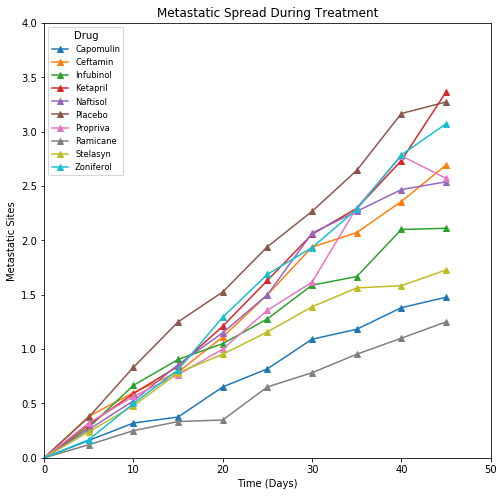

In [13]:
# Generate the Plot (with Error Bars)

meta_data_pivot.reset_index(inplace=True) 

plt.figure(figsize=(8,8))

x_axis = tumor_data_pivot["Timepoint"]

plt.plot(x_axis,meta_data_pivot["Capomulin"], marker='^')
plt.plot(x_axis,meta_data_pivot["Ceftamin"], marker='^')
plt.plot(x_axis,meta_data_pivot["Infubinol"], marker='^')
plt.plot(x_axis,meta_data_pivot["Ketapril"], marker='^')
plt.plot(x_axis,meta_data_pivot["Naftisol"], marker='^')
plt.plot(x_axis,meta_data_pivot["Placebo"], marker='^')
plt.plot(x_axis,meta_data_pivot["Propriva"], marker='^')
plt.plot(x_axis,meta_data_pivot["Ramicane"], marker='^')
plt.plot(x_axis,meta_data_pivot["Stelasyn"], marker='^')
plt.plot(x_axis,meta_data_pivot["Zoniferol"], marker='^')

# Create a legend for our chart
                           
plt.xlabel("Time (Days)")
plt.ylabel("Metastatic Sites")
plt.legend(loc="upper left")
plt.title("Metastatic Spread During Treatment")

legend = plt.legend(fontsize="small", mode="Expanded", 
                 loc="best", title="Drug",
                 labelspacing=0.5)

plt.xlim(0, 50)
plt.ylim(0, 4)

#x.errorbar(np.arange(0, len(means)), means, yerr=sem, fmt="o", color="b", alpha=0.5, label="Mean of House Price")
#x.errorbar(x_axis, y-axis, standard_errors, fmt="o")

legend = plt.legend(fontsize="small", mode="Expanded", 
                 loc="best", title="Drug",
                 labelspacing=0.5)
legend.legendHandles[0]._sizes = [15]
legend.legendHandles[1]._sizes = [15]
legend.legendHandles[2]._sizes = [15]
legend.legendHandles[3]._sizes = [15]
legend.legendHandles[4]._sizes = [15]
legend.legendHandles[5]._sizes = [15]
legend.legendHandles[6]._sizes = [15]
legend.legendHandles[7]._sizes = [15]
legend.legendHandles[8]._sizes = [15]
legend.legendHandles[9]._sizes = [15]

#points_Capomulin_handle = plt.plot(x_axis, points_Capomulin, marker ='o', label="Capomulin")
#points_Ceftamin_handle = plt.plot(x_axis, points_Ceftamin, marker='^', color='blue', label="Infubinol")
#points_K_handle = plt.plot(x_axis, points_C, marker ='o', color='green', label="Ketapril")
#points_P_handle = plt.plot(x_axis, points_F, marker='x', color='gray', label="Placebo")

#x.errorbar(np.arange(0, len(means)), means, yerr=sem, fmt="o", color="b", alpha=0.5, label="Mean of House Price")
#x.errorbar(x_axis, y-axis, standard_errors, fmt="o")

# Save the Figure

plt.savefig("metatastic_spread_treatment.png")

# Show the Figure
plt.show()


In [14]:
#Survival Rates

# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
    
mouse_data=pharma_data_complete.groupby(["Drug", "Timepoint"]).count()


# Convert to DataFrame

del mouse_data["Metastatic Sites"]
del mouse_data["Tumor Volume (mm3)"]

mouse_data.rename(columns={'Mouse ID': 'Mouse Count'}, inplace=True)

# Preview DataFrame

mouse_data.head()
                                                 

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [15]:
# Minor Data Munging to Re-Format the Data Frames

mouse_data_pivot=pd.pivot_table(mouse_data, values = 'Mouse Count', index=['Timepoint'], columns = 'Drug')

# Preview the Data Frame

mouse_data_pivot


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


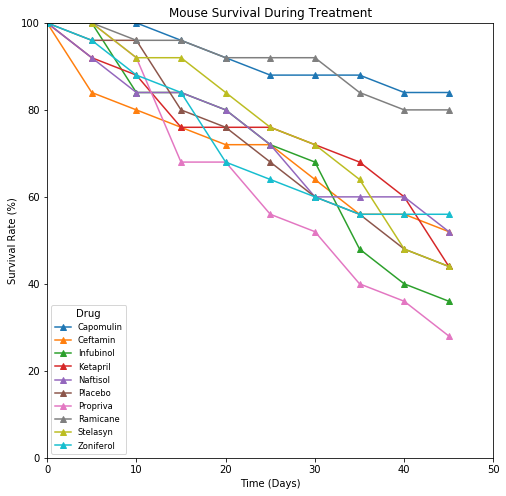

In [16]:
# Generate the Plot (Accounting for percentages)

mouse_data_pivot.reset_index(inplace=True)

plt.figure(figsize=(8,8))

x_axis = tumor_data_pivot["Timepoint"]

plt.plot(x_axis,mouse_data_pivot["Capomulin"]*4, marker='^')
plt.plot(x_axis,mouse_data_pivot["Ceftamin"]*4, marker='^')
plt.plot(x_axis,mouse_data_pivot["Infubinol"]*4, marker='^')
plt.plot(x_axis,mouse_data_pivot["Ketapril"]*4, marker='^')
plt.plot(x_axis,mouse_data_pivot["Naftisol"]*4, marker='^')
plt.plot(x_axis,mouse_data_pivot["Placebo"]*4, marker='^')
plt.plot(x_axis,mouse_data_pivot["Propriva"]*4, marker='^')
plt.plot(x_axis,mouse_data_pivot["Ramicane"]*4, marker='^')
plt.plot(x_axis,mouse_data_pivot["Stelasyn"]*4, marker='^')
plt.plot(x_axis,mouse_data_pivot["Zoniferol"]*4, marker='^')

# Create a legend for our chart

plt.legend(loc="lower right")
plt.title("Mouse Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")

legend = plt.legend(fontsize="small", mode="Expanded", 
                 loc="best", title="Drug",
                 labelspacing=0.5)

plt.xlim(0, 50)
plt.ylim(0, 100)

#x.errorbar(np.arange(0, len(means)), means, yerr=sem, fmt="o", color="b", alpha=0.5, label="Mean of House Price")
#x.errorbar(x_axis, y-axis, standard_errors, fmt="o")

legend = plt.legend(fontsize="small", mode="Expanded", 
                 loc="best", title="Drug",
                 labelspacing=0.5)
legend.legendHandles[0]._sizes = [15]
legend.legendHandles[1]._sizes = [15]
legend.legendHandles[2]._sizes = [15]
legend.legendHandles[3]._sizes = [15]
legend.legendHandles[4]._sizes = [15]
legend.legendHandles[5]._sizes = [15]
legend.legendHandles[6]._sizes = [15]
legend.legendHandles[7]._sizes = [15]
legend.legendHandles[8]._sizes = [15]
legend.legendHandles[9]._sizes = [15]

#points_Capomulin_handle = plt.plot(x_axis, points_Capomulin, marker ='o', label="Capomulin")
#points_Ceftamin_handle = plt.plot(x_axis, points_Ceftamin, marker='^', color='blue', label="Infubinol")
#points_K_handle = plt.plot(x_axis, points_C, marker ='o', color='green', label="Ketapril")
#points_P_handle = plt.plot(x_axis, points_F, marker='x', color='gray', label="Placebo")

#x.errorbar(np.arange(0, len(means)), means, yerr=sem, fmt="o", color="b", alpha=0.5, label="Mean of House Price")
#x.errorbar(x_axis, y-axis, standard_errors, fmt="o")

# Save the Figure

plt.savefig("mouse_survival_rate.png")

# Show the Figure
plt.show()


In [ ]:
#Summary Bar Graph

 # Calculate the percent changes in tumor volume after treatment for each drug
    
    Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

# Display the data to confirm

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()